In [132]:
%reload_ext autoreload
%autoreload 2

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from cv2 import *

In [134]:
model = keras.models.load_model('testModel')

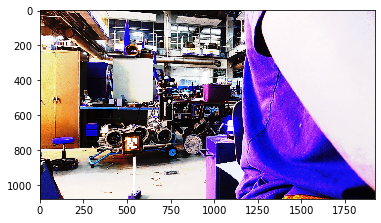

In [160]:
cam = VideoCapture(0)

#ret, im = cam.read()
im = cv2.imread('images/1622419505408716.jpg')
cam.release()
#im = cv2.resize(im, (1920, 1080))
plt.imshow(im)

In [161]:
sh = im.shape
newSh = (1, sh[0], sh[1], sh[2])
fixedIm = [np.reshape(im, newshape = newSh)]
fixedIm = np.concatenate(fixedIm, axis=0)

In [162]:
pred = model.predict(fixedIm)
labels=np.argmax(pred, axis=3)

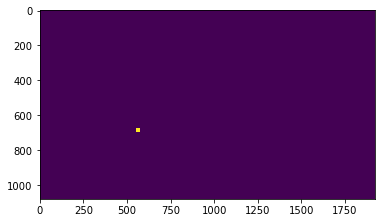

In [163]:
plt.imshow(labels[0,:,:])

In [168]:
predIm = labels[0,:,:]
predIm = (np.where(predIm > .5, 255, 0))
predIm = np.uint8(predIm)
predIm = cv2.cvtColor(predIm, cv2.COLOR_GRAY2BGR)

True

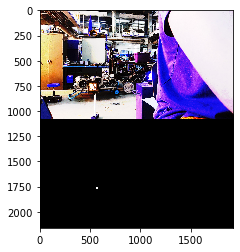

In [169]:
finalIm = np.concatenate((im, predIm), axis=0)
plt.imshow(finalIm)
imwrite('test.jpg', finalIm)